# Overlapping Null Models and Statistical Tests

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pybedtools
from pybedtools import BedTool
a = pybedtools.example_bedtool('a.bed')
a.saveas('tmp/fake_enhancers.bed')

<BedTool(tmp/fake_enhancers.bed)>

In [3]:
import random
from datetime import datetime

sample_bed = BedTool('tmp/fake_enhancers.bed')
b = sample_bed.shuffle(genome='hg19', chrom=False)
print(a)
print("after shuffle:\n")
print(b) 

chr1	1	100	feature1	0	+
chr1	100	200	feature2	0	+
chr1	150	500	feature3	0	-
chr1	900	950	feature4	0	+

after shuffle:

chr5	149675837	149675936	feature1	0	+
chr3	98172162	98172262	feature2	0	+
chr18	53670138	53670488	feature3	0	-
chr9	105522940	105522990	feature4	0	+



In [4]:
encode_bed = BedTool('tmp/T-cell_ENCODE_sample.bed')
fantom_bed = BedTool('tmp/permissive_enhancers.bed')

In [5]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def std_size(bed):
    return int(round(sample_df[['size']].std()))


In [6]:
mean_size(fantom_bed)

288

In [7]:
encode_bed_sorted = encode_bed.sort()
fantom_bed_sorted = fantom_bed.sort()

In [8]:
fantom_shuffled_bed = fantom_bed.shuffle(genome='hg19', chrom=False)
fantom_shuffled_bed_sorted = fantom_shuffled_bed.sort()
encode_shuffled_bed = encode_bed.shuffle(genome='hg19', chrom=False)
encode_shuffled_bed_sorted = encode_shuffled_bed.sort()

In [9]:
empty_bed = BedTool()
fantom_random_bed = empty_bed.random(l=mean_size(fantom_bed), n=len(fantom_bed), genome='hg19')
fantom_random_bed_sorted = fantom_random_bed.sort()

In [10]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [11]:
fantom_df = fantom_bed.to_dataframe()
fantom_df['size'] = fantom_df.apply(lambda row: compute_size(row), axis = 1)
fantom_df[['size']].describe()

,size
count,43011.000000
mean,287.958964
std,163.374268
min,2.000000
25%,177.000000
50%,275.000000
75%,372.000000
max,2860.000000


In [12]:
fantom_shuffled_df = fantom_shuffled_bed.to_dataframe()
fantom_shuffled_df['size'] = fantom_shuffled_df.apply(lambda row: compute_size(row), axis = 1)
fantom_shuffled_df[['size']].describe()

,size
count,43011.000000
mean,287.958964
std,163.374268
min,2.000000
25%,177.000000
50%,275.000000
75%,372.000000
max,2860.000000


In [13]:
encode_df = encode_bed.to_dataframe()
encode_df['size'] = encode_df.apply(lambda row: compute_size(row), axis = 1)
encode_df[['size']].describe()

,size
count,42001.000000
mean,1439.534273
std,2270.219731
min,150.000000
25%,150.000000
50%,859.000000
75%,1892.000000
max,92829.000000


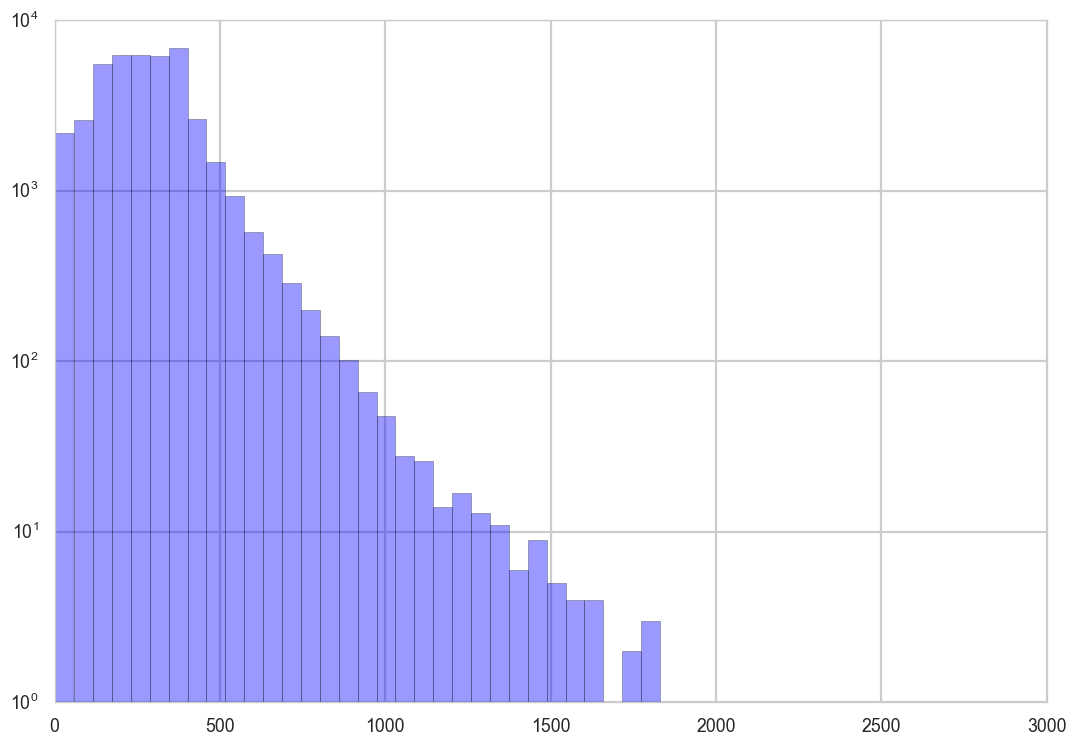

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
plot = sns.distplot(fantom_df[['size']], kde=False, fit=None, color='b')
plot.set_yscale('log')
#sns.distplot(fantom_shuffled_df[['size']], kde=False, fit=None)



In [15]:
np.logspace(1, 4, 50)

array([    10.        ,     11.51395399,     13.25711366,     15.26417967,
           17.57510625,     20.23589648,     23.29951811,     26.82695795,
           30.88843596,     35.56480306,     40.94915062,     47.14866363,
           54.28675439,     62.50551925,     71.9685673 ,     82.86427729,
           95.40954763,    109.8541142 ,    126.48552169,    145.63484775,
          167.68329368,    193.06977289,    222.29964825,    255.95479227,
          294.70517026,    339.32217719,    390.69399371,    449.8432669 ,
          517.94746792,    596.36233166,    686.648845  ,    790.60432109,
          910.29817799,   1048.11313415,   1206.79264064,   1389.49549437,
         1599.85871961,   1842.06996933,   2120.95088792,   2442.05309455,
         2811.76869797,   3237.45754282,   3727.59372031,   4291.93426013,
         4941.71336132,   5689.86602902,   6551.2855686 ,   7543.12006335,
         8685.11373751,  10000.        ])

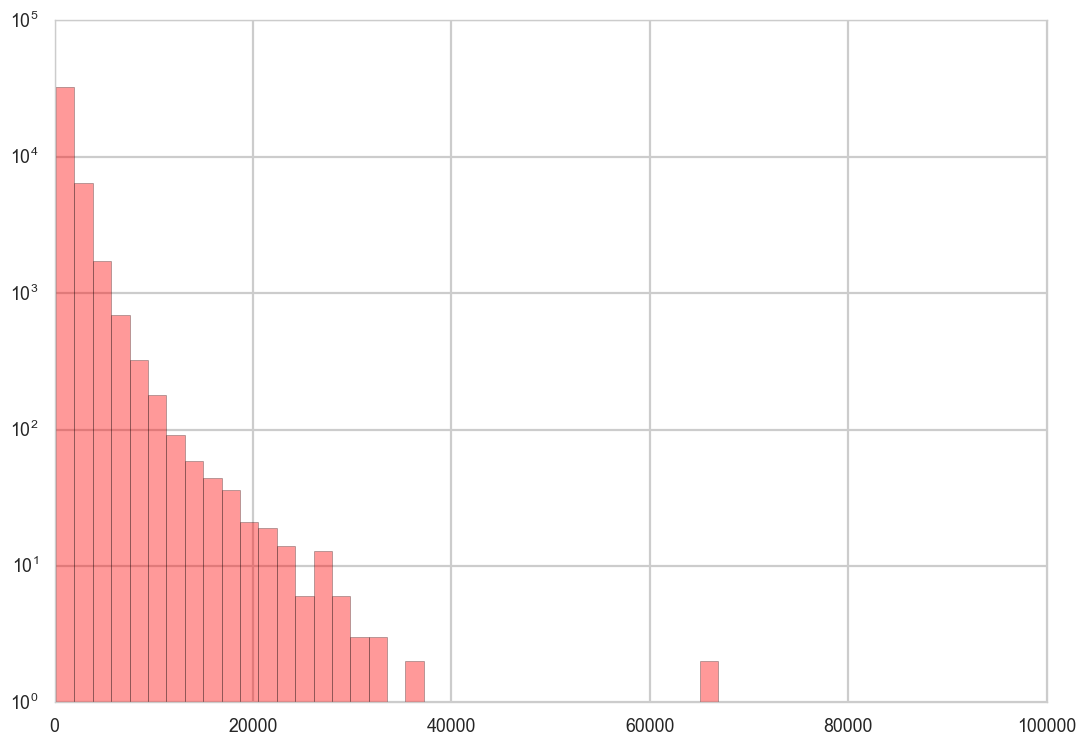

In [16]:
plot = sns.distplot(encode_df[['size']], kde=False, fit=None, color='r')

#plot = sns.distplot(encode_df[['size']], kde=False, fit=None, color='r', bins=np.logspace(1, 5, 50))
plot.set_yscale('log')
#plot.set_xscale('log')
# TODO try log binning

In [60]:
encode_bed_sorted.jaccard(fantom_shuffled_bed_sorted, F=1)

{'intersection': 198142,
 'jaccard': 0.00272828,
 'n_intersections': 710,
 'union-intersection': 72625217}

In [61]:
encode_bed_sorted.jaccard(encode_bed_sorted, F=1)

{'intersection': 60461879,
 'jaccard': 1.0,
 'n_intersections': 42001,
 'union-intersection': 60461879}

In [62]:
encode_bed_sorted.jaccard(fantom_bed_sorted, F=1)

{'intersection': 2523465,
 'jaccard': 0.0358836,
 'n_intersections': 7346,
 'union-intersection': 70323603}

In [63]:
encode_bed_sorted.fisher(encode_bed_sorted, F=1, genome='hg19')

<FisherOutput at 4793529904>
# Number of query intervals: 42001
# Number of db intervals: 42001
# Number of overlaps: 42001
# Number of possible intervals (estimated): 1088888
# phyper(42001 - 1, 42001, 1088888 - 42001, 42001, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 42001        | 0            |
# not in -a | 0            | 1046887      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	0	0	inf

In [64]:
encode_bed_sorted.fisher(fantom_shuffled_bed_sorted, F=1, genome='hg19')

<FisherOutput at 4675258016>
# Number of query intervals: 42001
# Number of db intervals: 43007
# Number of overlaps: 715
# Number of possible intervals (estimated): 1813918
# phyper(715 - 1, 42001, 1813918 - 42001, 43007, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 715          | 41286        |
# not in -a | 42292        | 1729625      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
6.1806e-22	1	1.2448e-21	0.708

In [65]:
a = encode_bed_sorted.fisher(fantom_bed_sorted, F=1, genome='hg19')

In [66]:
a

<FisherOutput at 4652783040>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 7347
# Number of possible intervals (estimated): 1813917
# phyper(7347 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 7347         | 34654        |
# not in -a | 35663        | 1736253      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	10.322

In [40]:
import scipy.stats as stats
obs = [[1000, 41001], [42010, 1729906]]
oddsratio, pvalue = stats.fisher_exact(obs)
chi2 = stats.chi2_contingency(obs)
print("Fisher's oddsratio:", oddsratio, "pvalue:", pvalue)
print("Chi2:", chi2[0], "pvalue:", chi2[1])

Fisher's oddsratio: 1.00432754582 pvalue: 0.883911414896
Chi2: 0.0137163422923 pvalue: 0.906767505506


In [41]:
len(encode_bed_sorted)

42001

In [67]:
encode_bed_sorted.fisher(fantom_bed_sorted, F=1, genome='hg19')

<FisherOutput at 4793531864>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 7347
# Number of possible intervals (estimated): 1813917
# phyper(7347 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 7347         | 34654        |
# not in -a | 35663        | 1736253      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	10.322

In [43]:
sample_df = sample_bed.to_dataframe()
sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
int(round(sample_df[['size']].mean()))


150

In [44]:
len(sample_df)

4

## Fisher, Jaccard

In [46]:
def build_tests_df(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'fisher_left_p', 'fisher_right_p', 'fisher_two_p', 'fisher_oddsratio', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, samples_num):
        min_ovlp = i* 1/samples_num

        #fisher test
        fisher = bed.fisher(bed_overlap_with, F=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        left_tail_fisher_pvalue = fisher.left_tail
        right_tail_fisher_pvalue = fisher.right_tail
        two_tail_fisher_pvalue = fisher.two_tail
        oddsratio_fisher = fisher.ratio

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, F=min_ovlp)
        jaccard_index = jaccard['jaccard']

        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, left_tail_fisher_pvalue, right_tail_fisher_pvalue, 
                     two_tail_fisher_pvalue, oddsratio_fisher, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df
    

In [47]:
base_encyclopedia = 'ENCODE'
biosample_name = 'T-cell'
overlapping_encyclopedia = 'FANTOM'


tests_df = build_tests_df(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'T-cell', 'hg19', 50)
tests_df_shuffled = build_tests_df(encode_bed_sorted, fantom_shuffled_bed_sorted, 'ENCODE', 'FANTOM_shuffled', 'T-cell', 'hg19', 50)
tests_df_random = build_tests_df(encode_bed_sorted, fantom_random_bed_sorted, 'ENCODE', 'FANTOM_random', 'T-cell', 'hg19', 50)

In [48]:
tests_df.T

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_name,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,...,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell
ovlp_encyclopedia,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,...,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM
encyclopedia_size,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001,...,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001
ovlp_encyclopedia_size,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011,...,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011
min_ovlp,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,...,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98
ovlp_count,8907,8893,8870,8848,8821,8796,8773,8755,8719,8695,...,7586,7557,7532,7502,7482,7460,7443,7407,7391,7371
fisher_left_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fisher_right_p,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
tests_df_random.T

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_name,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,...,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell
ovlp_encyclopedia,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,...,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random
encyclopedia_size,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001,...,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001
ovlp_encyclopedia_size,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011,...,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011
min_ovlp,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,...,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98
ovlp_count,980,974,966,961,957,950,944,938,933,926,...,725,724,723,720,713,710,706,701,700,694
fisher_left_p,0.30979,0.24438,0.17004,0.1318,0.10579,0.069505,0.046745,0.030365,0.02063,0.011512,...,1.8136e-20,1.2983e-20,9.2809e-21,3.3616e-21,2.9904e-22,1.0376e-22,2.4793e-23,4.0085e-24,2.7721e-24,2.9402e-25
fisher_right_p,0.70161,0.76576,0.83812,0.87508,0.9001,0.93479,0.95639,0.97184,0.98096,0.98945,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,0.62643,0.48542,0.33846,0.26293,0.21155,0.13981,0.094673,0.062043,0.040922,0.02311,...,3.7311e-20,2.7503e-20,1.7587e-20,6.933e-21,5.7086e-22,2.173e-22,5.0868e-23,8.3544e-24,5.9871e-24,5.7425e-25


In [68]:
merged_tests_df = tests_df.append(tests_df_random).append(tests_df_shuffled)
merged_tests_df.reset_index(drop=True, inplace=True)
merged_tests_df['logp'] = -1*np.log(merged_tests_df['fisher_right_p'])

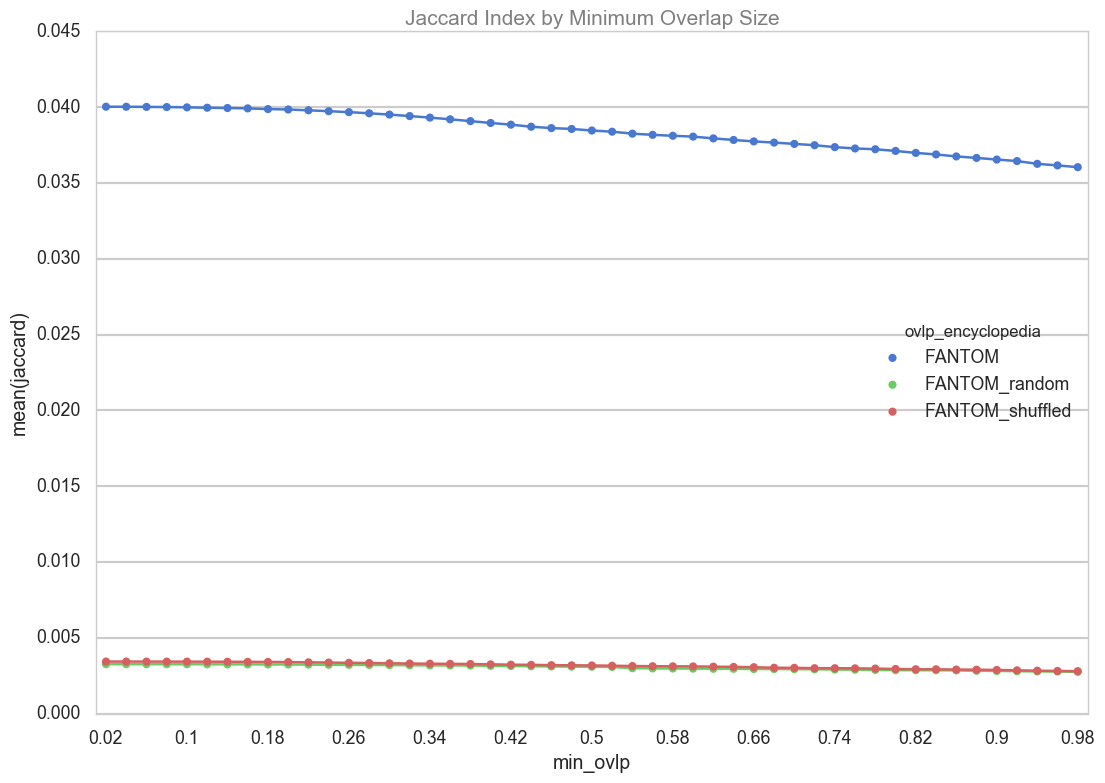

In [69]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

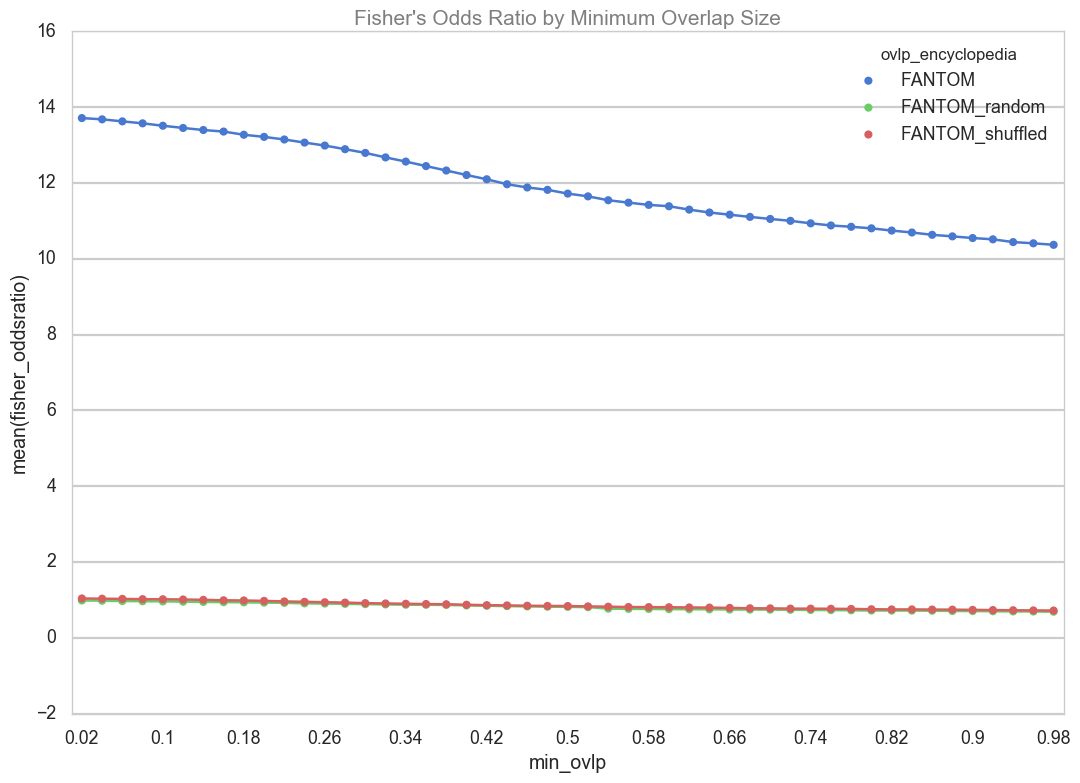

In [70]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_oddsratio", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Odds Ratio by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

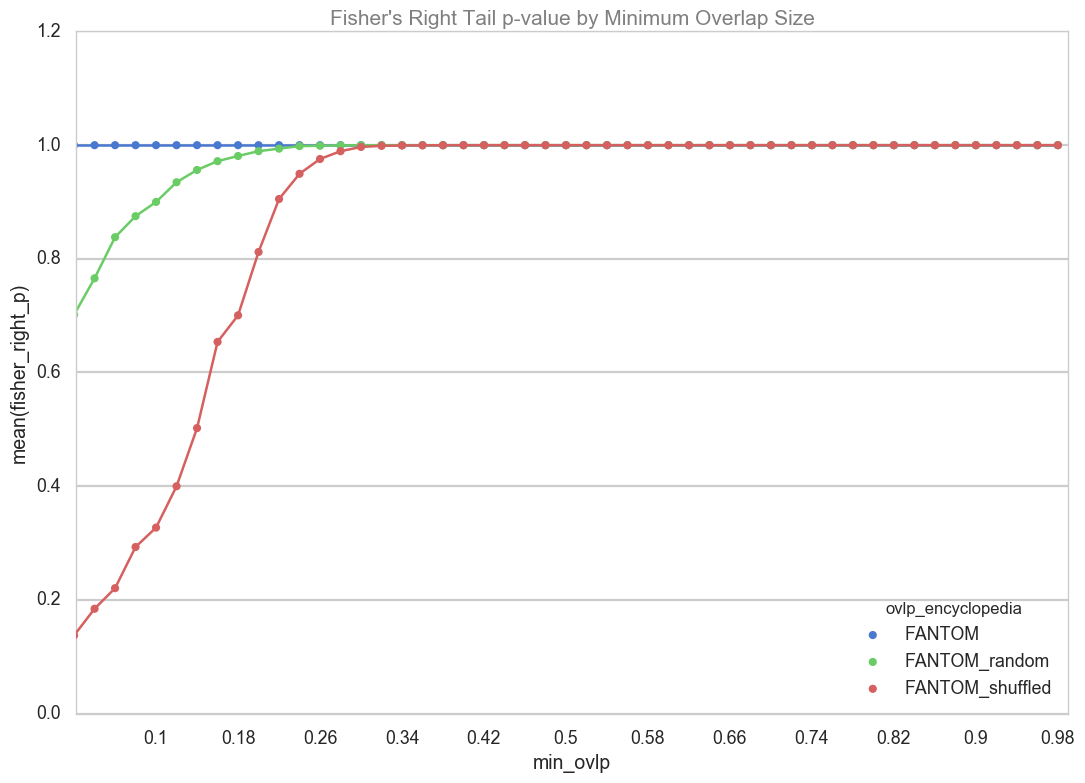

In [73]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_right_p", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
g.set_xlim(0.1,)
g.set_ylim(0,)
#g.set_ylim(0, 200)
##TODO plottare -log(p-value)
#sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

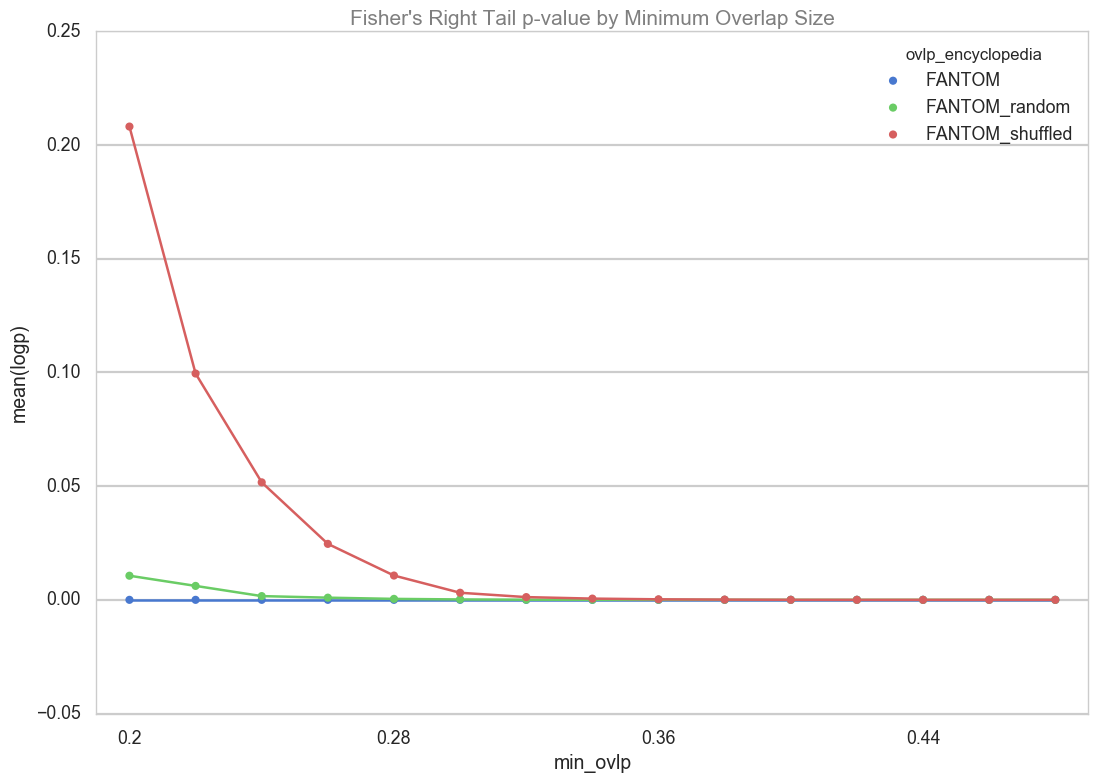

In [74]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="logp", hue="ovlp_encyclopedia", data=merged_tests_df.query('min_ovlp < 0.5 & min_ovlp > 0.18'),
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
#g.set_xlim(0.18,)
#g.set_ylim(0,)
#g.set_ylim(0, 200)
##TODO plottare -log(p-value)
#sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

## Relative Distance

In [118]:
import pandas as pd
df_reldist = pd.DataFrame(encode_bed_sorted.reldist(fantom_bed_sorted))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,3198.000,1642.000,1325.000,1143.000,1058.000,1068.000,999.000,889.000,894.000,867.000,...,703.000,661.000,680.000,686.000,678.000,698.000,657.000,663.000,652.000,690.000
fraction,0.076,0.039,0.032,0.027,0.025,0.025,0.024,0.021,0.021,0.021,...,0.017,0.016,0.016,0.016,0.016,0.017,0.016,0.016,0.016,0.016
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.090,...,0.400,0.410,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490
total,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,...,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000,41926.000


In [119]:
df_reldist_full = pd.DataFrame(columns=['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size',
                    'ovlp_encyclopedia_size',
                    'reldist', 'ovlp_count', 'ovlp_fraction'])


In [120]:
df_reldist_full['reldist'] = df_reldist['reldist']
df_reldist_full['ovlp_count'] = df_reldist['count']
df_reldist_full['ovlp_fraction'] = df_reldist['fraction']


In [121]:
df_reldist_random = pd.DataFrame(encode_bed_sorted.reldist(fantom_shuffled_bed_sorted))
df_reldist_random = df_reldist_random[0:50]

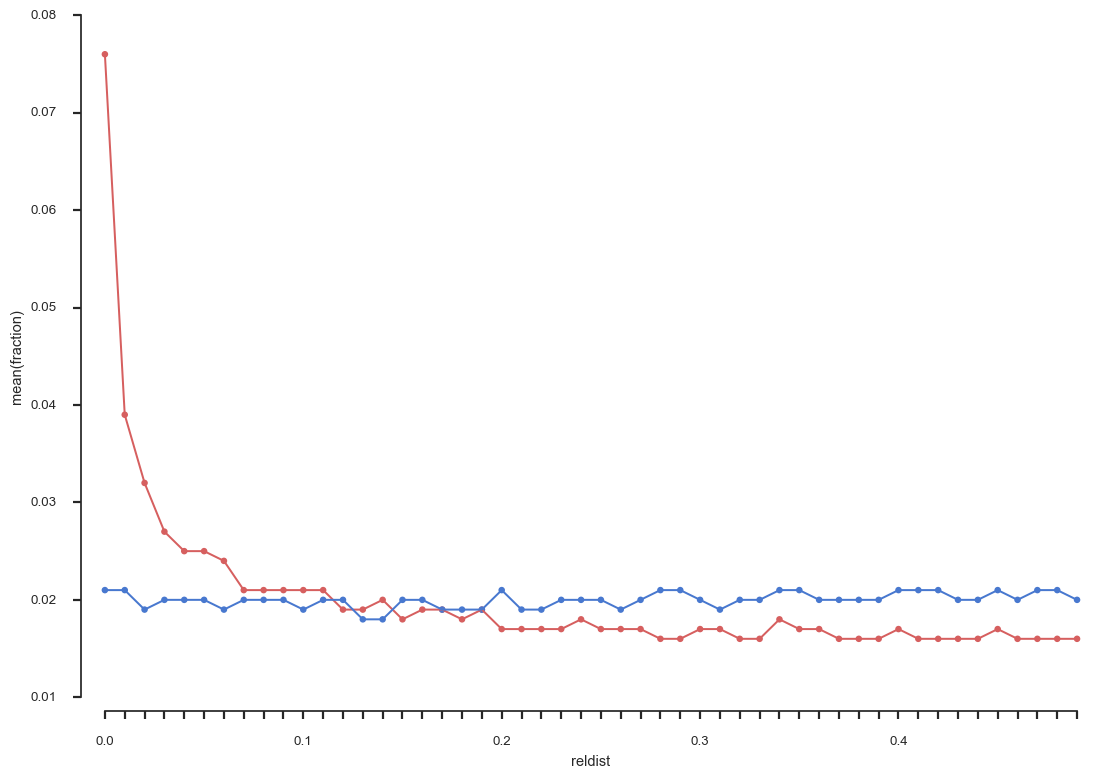

In [122]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist,  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random, color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        


## z test

In [123]:
import datetime

class Timer(object):
    """A simple timer class"""
    
    def __init__(self):
        pass
    
    def start(self):
        """Starts the timer"""
        self.start = datetime.datetime.now()
        return self.start
    
    def stop(self, message="Total: "):
        """Stops the timer.  Returns the time elapsed"""
        self.stop = datetime.datetime.now()
        return message + str(self.stop - self.start)
    
    def now(self, message="Now: "):
        """Returns the current time with a message"""
        return message + ": " + str(datetime.datetime.now())
    
    def elapsed(self, message="Elapsed: "):
        """Time elapsed since start was called"""
        return message + str(datetime.datetime.now() - self.start)
    
    def split(self, message="Split started at: "):
        """Start a split timer"""
        self.split_start = datetime.datetime.now()
        return message + str(self.split_start)
    
    def unsplit(self, message="Unsplit: "):
        """Stops a split. Returns the time elapsed since split was called"""
        return message + str(datetime.datetime.now() - self.split_start)

In [75]:
real_size = float(encode_bed.intersect(fantom_bed, F=0.8).count())
real_size

7586.0

In [192]:
from joblib import Parallel, delayed
import multiprocessing

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num, 
                             genome=assembly)
    row_array = [idx, bed.intersect(random_bed, F=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)
    
def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed_overlap_with.shuffle(genome=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

# creates random sequence and overlap n times and compute a statistics
def create_random_overlap_distribution(bed, bed_overlap_with, assembly, min_overlap, samples_num, strategy='random'):  
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']
    tests_df = pd.DataFrame(columns=columns)
    
    if strategy == 'shuffle':
        for i in range(0, samples_num):
            tests_df = tests_df.append(build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, columns, i))
    else:
        for i in range(0, samples_num):
            tests_df = tests_df.append(build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, columns, i))
    
    return tests_df

# creates in parallel random sequence and overlap n times and compute a statistics
def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, samples_num, strategy='random'):  
    num_cores = multiprocessing.cpu_count()
    
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']
    tests_df = pd.DataFrame(columns=columns)
    
    if strategy == 'shuffle':
        df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                                   (bed, bed_overlap_with, min_overlap, assembly, columns, i) 
                                                   for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                                   (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                                   for i in range(0, samples_num))
    return pd.concat(df_list)

def create_random_bed(intervals_size, intervals_num, assembly):
    empty_bed = BedTool()
    return empty_bed.random(l=intervals_size, n=intervals_num, genome=assembly)

def test_random_overlap(bed, bed_overlap_with, assembly, min_overlap, samples_num): 
    results = [None]*samples_num
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    
    for i in range(0, samples_num):
        results[i] = create_random_bed(intervals_size, intervals_num, assembly)
    
    return results
        
def test_parallel_random_overlap(bed, bed_overlap_with, assembly, min_overlap, samples_num): 
    results = [None]*samples_num
    num_cores = multiprocessing.cpu_count()
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()

    results = Parallel(n_jobs=num_cores)(delayed(create_random_bed)(intervals_size, intervals_num, assembly) for i in range(0, samples_num))
    
    return results

In [167]:
print("Non Parallel random interval generation")
timer = Timer()
timer.start()
res = test_random_overlap(encode_bed, fantom_bed, 'hg19', 0.5, 100)
timer.elapsed()

Non Parallel random interval generation


'Elapsed: 0:00:05.515367'

In [168]:
print("Parallelized random interval generation")
timer = Timer()
timer.start()
res_par = test_parallel_random_overlap(encode_bed, fantom_bed, 'hg19', 0.5, 100)
timer.elapsed()

Parallelized random interval generation


'Elapsed: 0:00:03.072887'

In [171]:
timer = Timer()
timer.start()
create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.5, 100)
timer.elapsed()

'Elapsed: 0:00:22.418746'

In [178]:
timer = Timer()
timer.start()
runs_nonparallel_df = create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.5, 100)
timer.elapsed()

'Elapsed: 0:00:21.557293'

In [188]:
runs_nonparallel_df.describe()

,sample_num,size
count,100.000000,100.000000
mean,49.500000,73.330000
std,29.011492,8.407614
min,0.000000,46.000000
25%,24.750000,67.000000
50%,49.500000,74.000000
75%,74.250000,79.000000
max,99.000000,93.000000


In [189]:
timer = Timer()
timer.start()
runs_parallel_df = create_random_overlap_distribution_parallelized(encode_bed, fantom_bed, 'hg19', 0.5, 1000)
timer.elapsed()

'Elapsed: 0:00:55.651799'

In [193]:
timer = Timer()
timer.start()
runs_parallel_shuffled_df = create_random_overlap_distribution_parallelized(encode_bed, fantom_bed, 'hg19', 0.5, 1000, 'shuffle')
timer.elapsed()

'Elapsed: 0:02:16.592394'

In [190]:
runs_parallel_df.describe()

,sample_num,size
count,1000.000000,1000.000000
mean,499.500000,74.083000
std,288.819436,8.702059
min,0.000000,48.000000
25%,249.750000,68.750000
50%,499.500000,73.500000
75%,749.250000,80.000000
max,999.000000,105.000000


In [44]:
timer = Timer()
timer.start()
runs_df = create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.5, 1000)
timer.elapsed()

'Elapsed: 0:35:18.009327'

In [45]:
timer = Timer()
timer.start()
runs_shuffled_df = create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.5, 1000, 'shuffle')
timer.elapsed()

'Elapsed: 0:07:24.829606'

In [46]:
runs_df.T

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,990.0,991.0,992.0,993.0,994.0,995.0,996.0,997.0,998.0,999.0
size,68.0,71.0,78.0,61.0,67.0,72.0,75.0,69.0,77.0,71.0,...,82.0,76.0,62.0,64.0,84.0,64.0,74.0,83.0,68.0,82.0


In [47]:
random_mean_size = float(runs_df[['size']].mean())
random_std = float(runs_df[['size']].std())
shuffled_mean_size = float(runs_shuffled_df[['size']].mean())
shuffled_std = float(runs_shuffled_df[['size']].std())


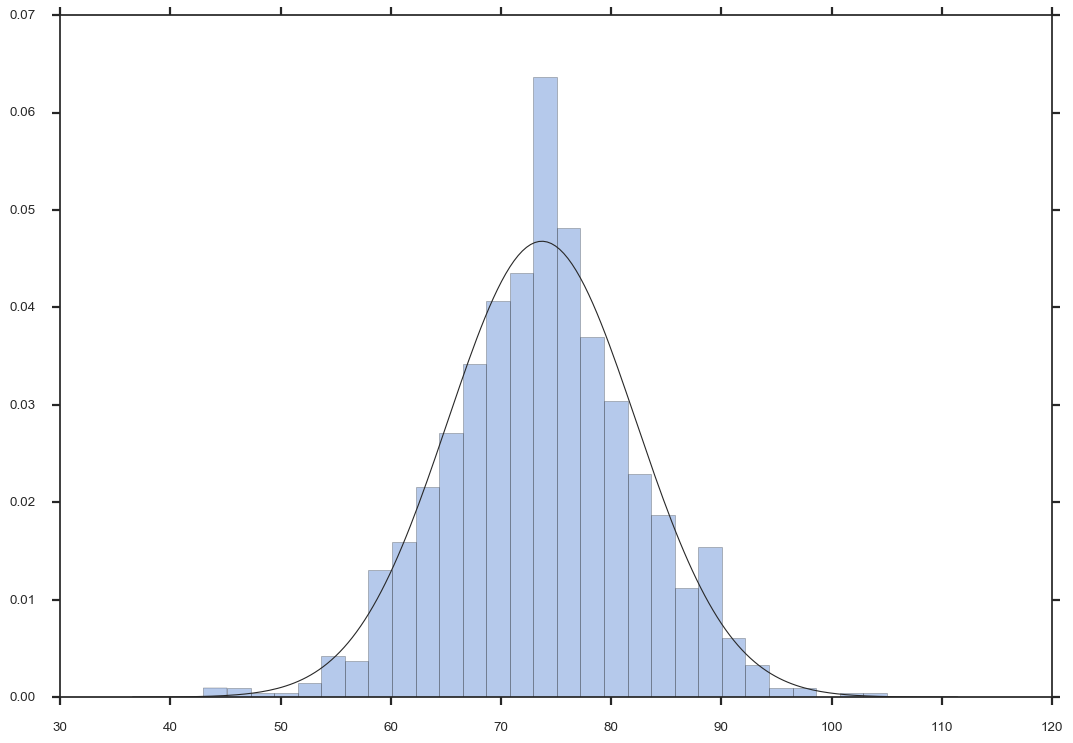

In [48]:
#sns.distplot(runs_df[['size']])
sns.distplot(runs_df[['size']], kde=False, fit=stats.norm)

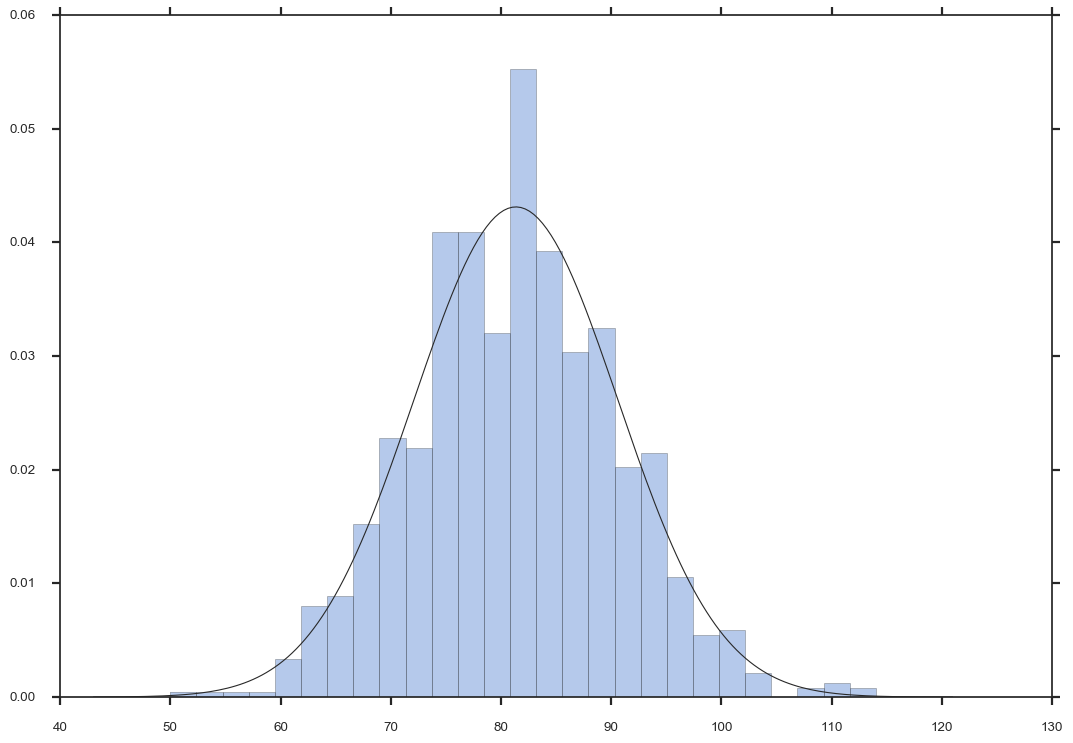

In [49]:
sns.distplot(runs_shuffled_df[['size']], kde=False, fit=stats.norm)

In [50]:
z = (real_size - random_mean_size) / random_std
z_shuffled = (real_size - shuffled_mean_size) / shuffled_std

In [51]:
print("z from random:", z, "z from shuffled:", z_shuffled)

z from random: 71.54222407403147 z from shuffled: 65.1148046305592


In [68]:
print("real size:", real_size, "random mean:", random_mean_size, "shuffled mean:", shuffled_mean_size)

real size: 684.0 random mean: 73.707 shuffled mean: 81.349


In [66]:
from scipy import stats
t, pvalue = stats.ttest_1samp(runs_df[['size']], 80)
print("t:",t, "pvalue:", pvalue)

t: [-23.32822956] pvalue: [  1.96230442e-96]


In [73]:
from scipy import stats
t, pvalue = stats.ttest_1samp(runs_shuffled_df[['size']], random_mean_size)
print("t:",t, "pvalue:", pvalue)

t: [ 26.11084301] pvalue: [  5.47180521e-115]


In [210]:
def compute_z(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'z_random', 'z_shuffled', 'fisher_right_p', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, 10):
        min_ovlp = i*0.1
       
        #fisher test
        fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        right_tail_fisher_pvalue = fisher.right_tail

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
        jaccard_index = jaccard['jaccard']
        
        # z test
        runs_shuffled_df = create_random_overlap_distribution(
            bed, bed_overlap_with, assembly, min_ovlp, samples_num, 'shuffle')
        runs_random_df = create_random_overlap_distribution(
            bed, bed_overlap_with, assembly, min_ovlp, samples_num)
        
        random_mean_count = float(runs_random_df[['size']].mean())
        random_std = float(runs_random_df[['size']].std())
        shuffled_mean_count = float(runs_shuffled_df[['size']].mean())
        shuffled_std = float(runs_shuffled_df[['size']].std())

        z_random = (overlaps_count - random_mean_count) / random_std
        z_shuffled = (overlaps_count - shuffled_mean_count) / shuffled_std
    
        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, z_random, z_shuffled, right_tail_fisher_pvalue, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df


def compute_tests_job(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, min_ovlp, assembly, df_columns, samples_num):
    #fisher test
    fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
    overlaps_count = fisher.table['in -a']['in -b']
    right_tail_fisher_pvalue = fisher.right_tail

    # jaccard index
    jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
    jaccard_index = jaccard['jaccard']
    
    # z test
    runs_shuffled_df = create_random_overlap_distribution_parallelized(
        bed, bed_overlap_with, assembly, min_ovlp, samples_num, 'shuffle')
    runs_random_df = create_random_overlap_distribution_parallelized(
        bed, bed_overlap_with, assembly, min_ovlp, samples_num)
    
    random_mean_count = float(runs_random_df[['size']].mean())
    random_std = float(runs_random_df[['size']].std())
    shuffled_mean_count = float(runs_shuffled_df[['size']].mean())
    shuffled_std = float(runs_shuffled_df[['size']].std())

    z_random = (overlaps_count - random_mean_count) / random_std
    z_shuffled = (overlaps_count - shuffled_mean_count) / shuffled_std
    
    row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                 min_ovlp, overlaps_count, z_random, z_shuffled, right_tail_fisher_pvalue, jaccard_index]

    return pd.DataFrame([row_array], columns=df_columns)

def compute_z_parallelized(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num, random_samples_num):
    #num_cores = multiprocessing.cpu_count()
    
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'z_random', 'z_shuffled', 'fisher_right_p', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
#    df_list = Parallel(n_jobs=num_cores)(delayed(compute_tests_job)(
#            bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, i*0.1, assembly, columns, samples_num) 
#                               for i in range(1, 10))

#    tests_df = pd.concat(df_list)
#    tests_df.reset_index(inplace=True, drop=True)
#    return tests_df

        
    for i in range(1, samples_num):
        min_ovlp = i * 1. / samples_num
        #min_ovlp = i*0.1
       
        #fisher test
        fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        right_tail_fisher_pvalue = fisher.right_tail

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
        jaccard_index = jaccard['jaccard']
        
        # z test
        runs_shuffled_df = create_random_overlap_distribution_parallelized(
            bed, bed_overlap_with, assembly, min_ovlp, random_samples_num, 'shuffle')
        runs_random_df = create_random_overlap_distribution_parallelized(
            bed, bed_overlap_with, assembly, min_ovlp, random_samples_num)
        
        random_mean_count = float(runs_random_df[['size']].mean())
        random_std = float(runs_random_df[['size']].std())
        shuffled_mean_count = float(runs_shuffled_df[['size']].mean())
        shuffled_std = float(runs_shuffled_df[['size']].std())

        z_random = (overlaps_count - random_mean_count) / random_std
        z_shuffled = (overlaps_count - shuffled_mean_count) / shuffled_std
    
        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, z_random, z_shuffled, right_tail_fisher_pvalue, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df

In [211]:
# need to parallelize!!!
timer = Timer()
timer.start()
test_z_df = compute_z_parallelized(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'T-cell', 'hg19', 100)
timer.elapsed()

'Elapsed: 0:03:28.012733'

In [102]:
# need to parallelize!!!
timer = Timer()
timer.start()
test_z_df = compute_z(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'T-cell', 'hg19', 100)
timer.elapsed()

'Elapsed: 0:38:44.684550'

In [196]:
test_z_df['log_z_random'] = np.log(test_z_df['z_random'])
test_z_df['log_z_shuffled'] = np.log(test_z_df['z_shuffled'])
test_z_df

,encyclopedia,biosample_name,ovlp_encyclopedia,encyclopedia_size,ovlp_encyclopedia_size,min_ovlp,ovlp_count,z_random,z_shuffled,fisher_right_p,jaccard,log_z_random,log_z_shuffled
0,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.1,4474.0,177.576318,182.148456,1.000000e+00,0.022231,5.179400,5.204822
1,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.2,2529.0,182.743444,154.135122,1.000000e+00,0.012206,5.208083,5.037830
2,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.3,1654.0,119.615353,106.481764,1.495200e-85,0.007260,4.784281,4.667974
3,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.4,1216.0,136.393595,103.903494,2.565700e-12,0.004569,4.915545,4.643463
4,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.5,1000.0,103.363412,100.084619,4.514700e-01,0.003174,4.638251,4.606016
5,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.6,872.0,97.716557,89.338830,9.999800e-01,0.002448,4.582071,4.492436
6,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.7,777.0,99.158622,84.221460,1.000000e+00,0.001987,4.596721,4.433450
7,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.8,684.0,98.010819,85.679865,1.000000e+00,0.001643,4.585078,4.450618
8,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.9,578.0,83.674093,88.417367,1.000000e+00,0.001320,4.426929,4.482068


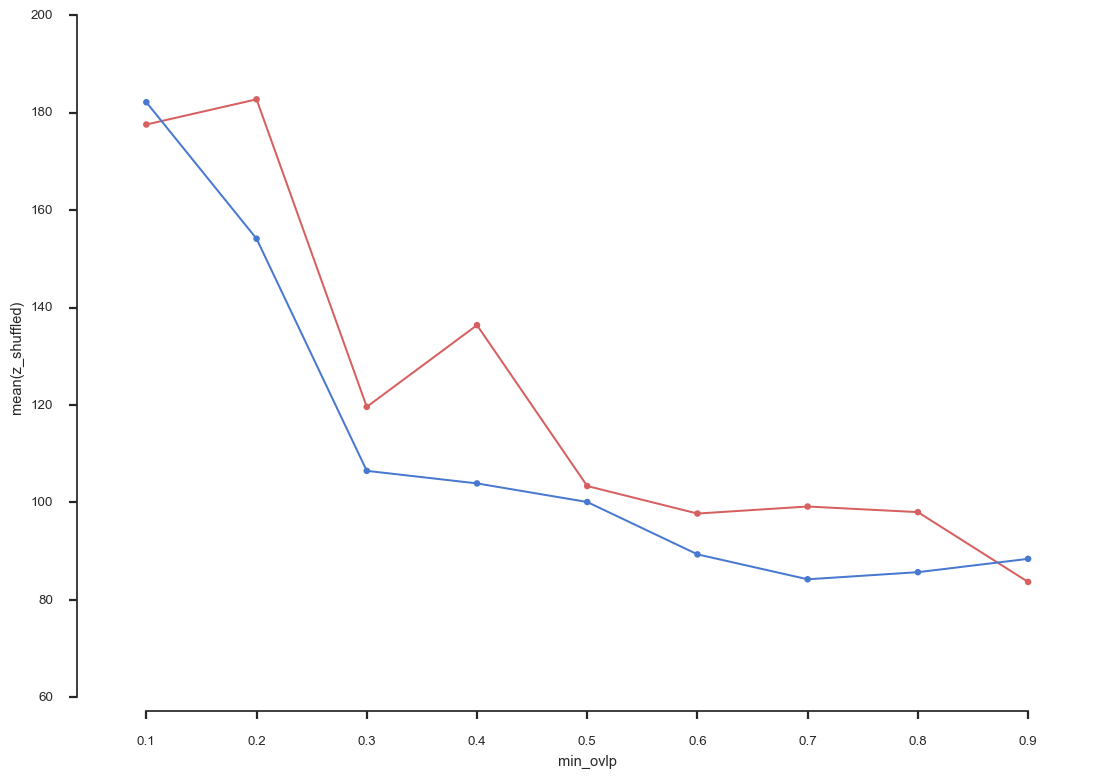

In [197]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='min_ovlp', y='z_random', data=test_z_df,  color='r')
g2 = sns.pointplot(x='min_ovlp', y='z_shuffled', data=test_z_df, color='b')

sns.despine(offset=10, trim=True)

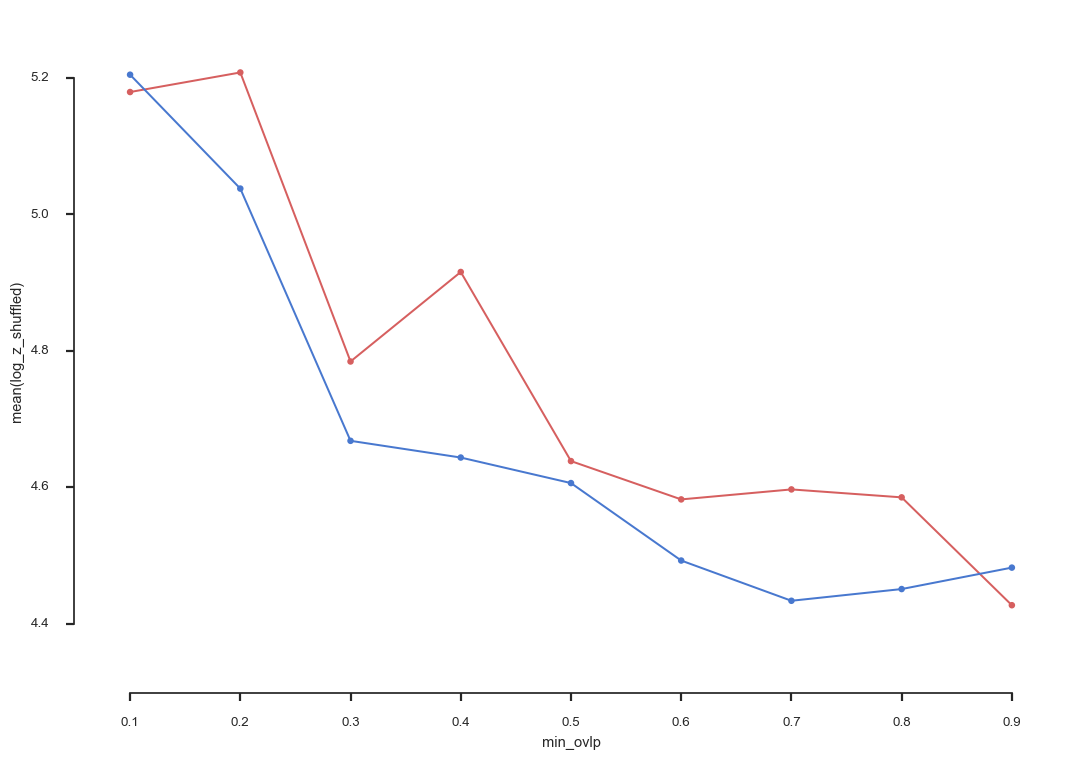

In [198]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='min_ovlp', y='log_z_random', data=test_z_df,  color='r')
g2 = sns.pointplot(x='min_ovlp', y='log_z_shuffled', data=test_z_df, color='b')

sns.despine(offset=1, trim=True)

## Massive tests on tissues

In [1]:
import pandas as pd

In [2]:
tests_df = pd.read_hdf('../storage/stats.hdf', 'encode_fantom_tests')
tests_df.reset_index(drop=True, inplace=True)

In [3]:
tests_df.T

,0,1,2,3,4,5,6,7,8,9,...,731,732,733,734,735,736,737,738,739,740
biosample_name,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,...,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
encyclopedia_size,38634,38634,38634,38634,38634,38634,38634,38634,38634,38634,...,38719,38719,38719,38719,38719,38719,38719,38719,38719,38719
fisher_left_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
fisher_oddsratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059,0.053,0.05,0.047,0.041,0.04,0.037,0.035,0.03,0.026
fisher_right_p,1,1,2.5407e-239,2.0708e-28,0.99631,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
jaccard,0.0245088,0.0176481,0.0120312,0.00818131,0.00591123,0.00426546,0.00302555,0.00213949,0.00162165,0.00126438,...,0.000168556,0.000150199,0.000135367,0.000108888,8.61319e-05,8.46177e-05,7.97214e-05,7.62402e-05,6.29808e-05,5.50848e-05
min_ovlp,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
ovlp_count,6063,3935,2507,1627,1145,817,580,430,341,285,...,58,52,49,46,41,40,37,35,30,26


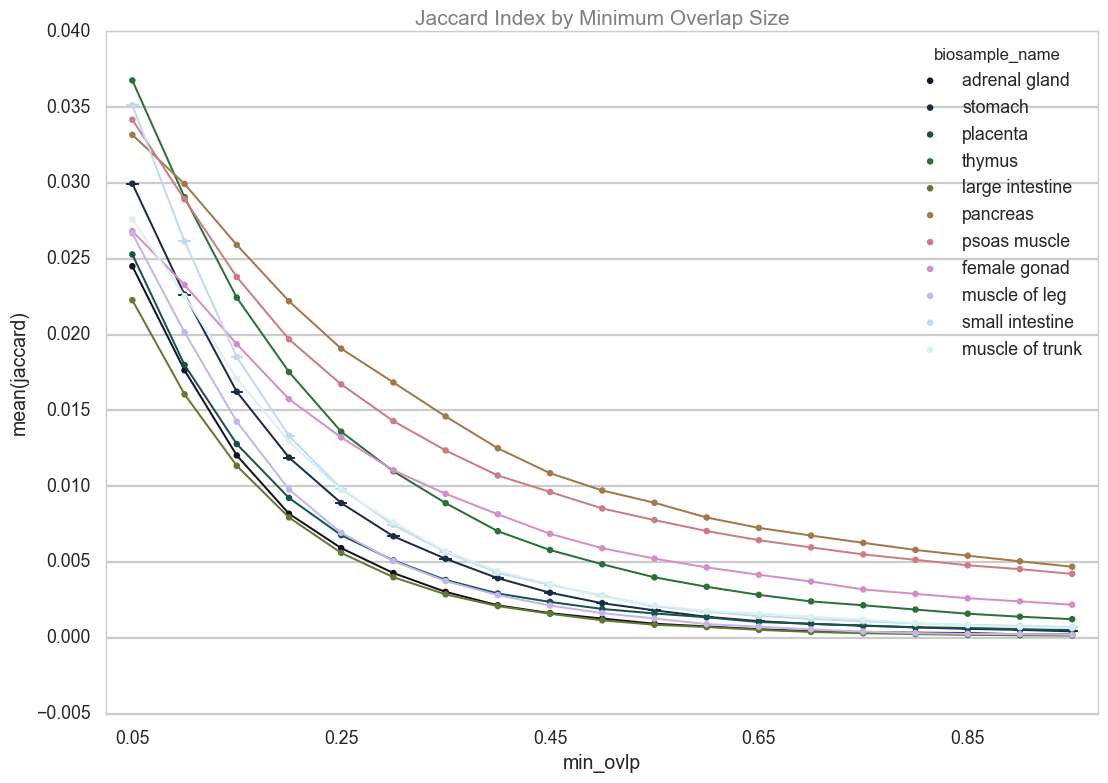

In [5]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

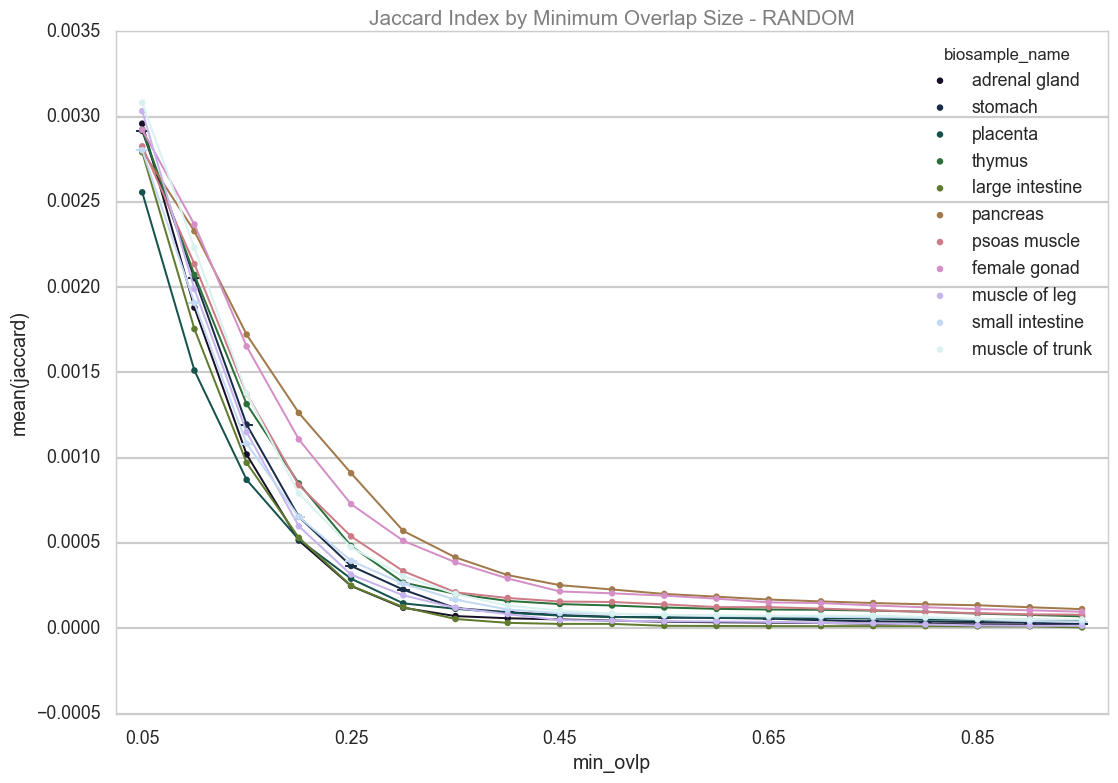

In [6]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="RANDOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size - RANDOM', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

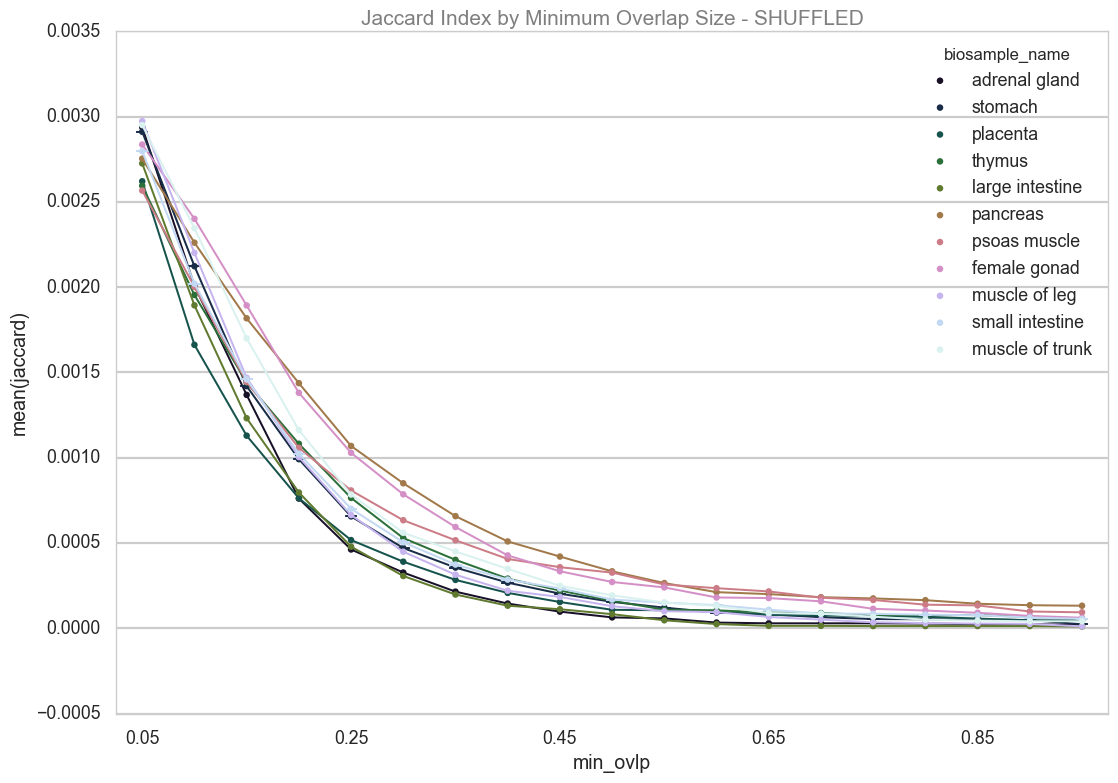

In [7]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="SHUFFLED"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size - SHUFFLED', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [8]:
tests_df['log_p'] = tests_df['fisher_right_p']

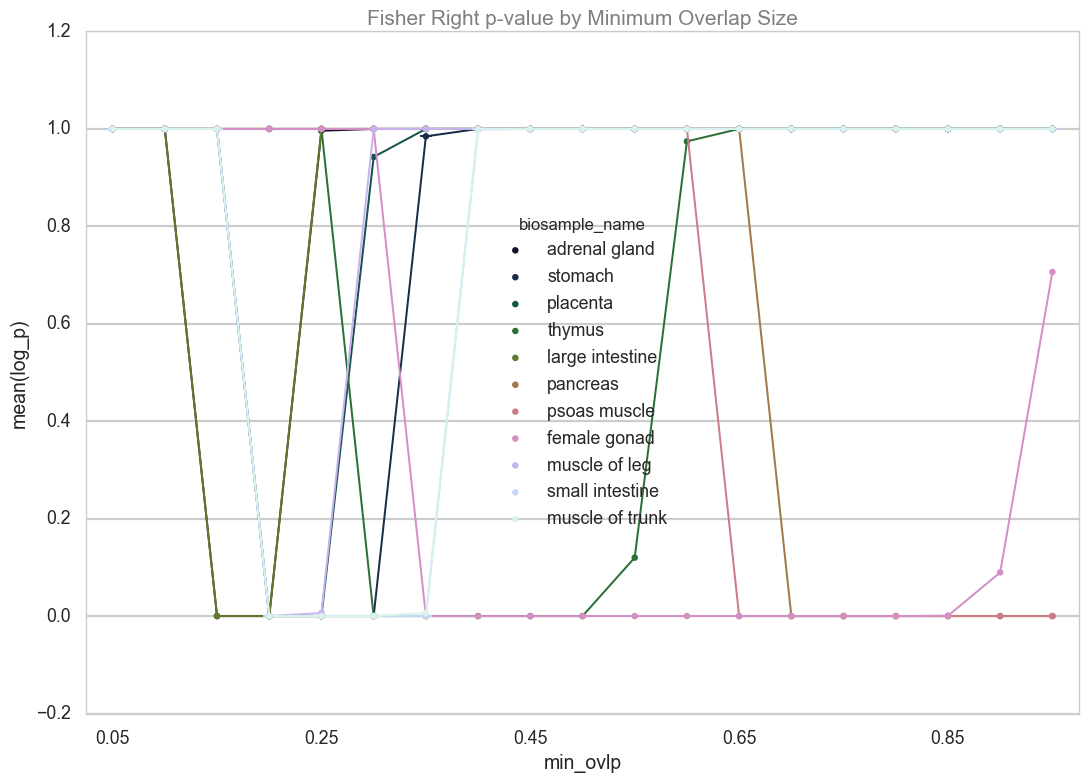

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="log_p", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Fisher Right p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

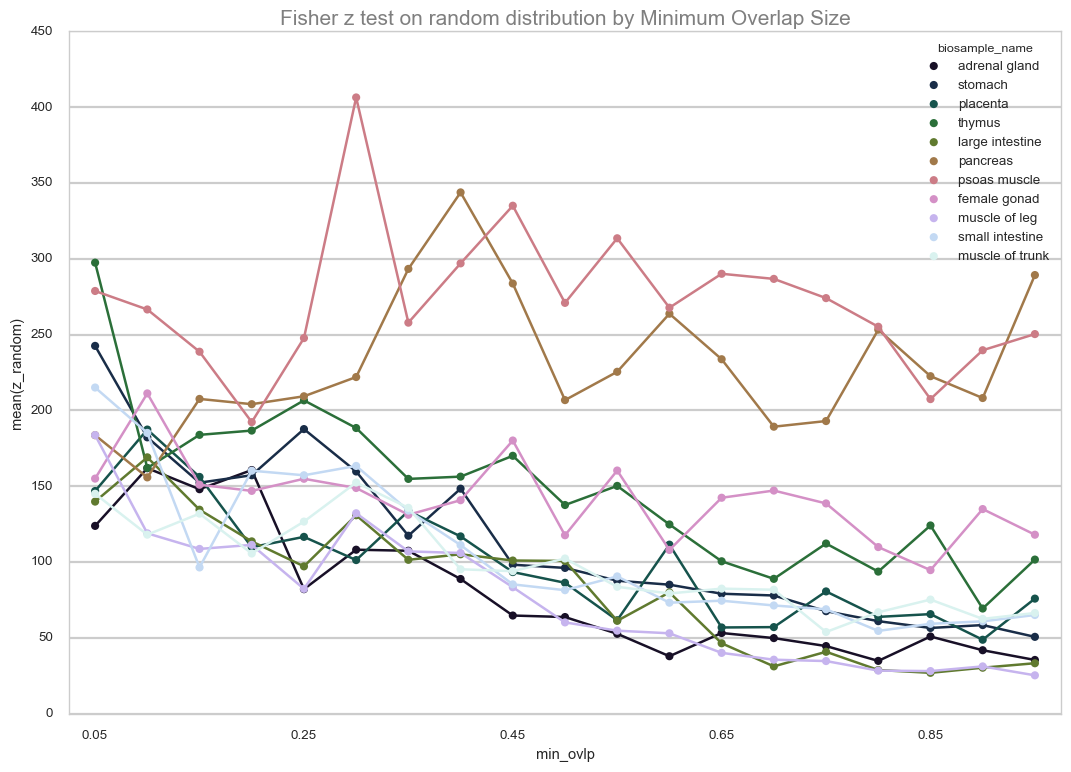

In [17]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="z_random", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1, ci=None)
g.axes.set_title('Fisher z test on random distribution by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

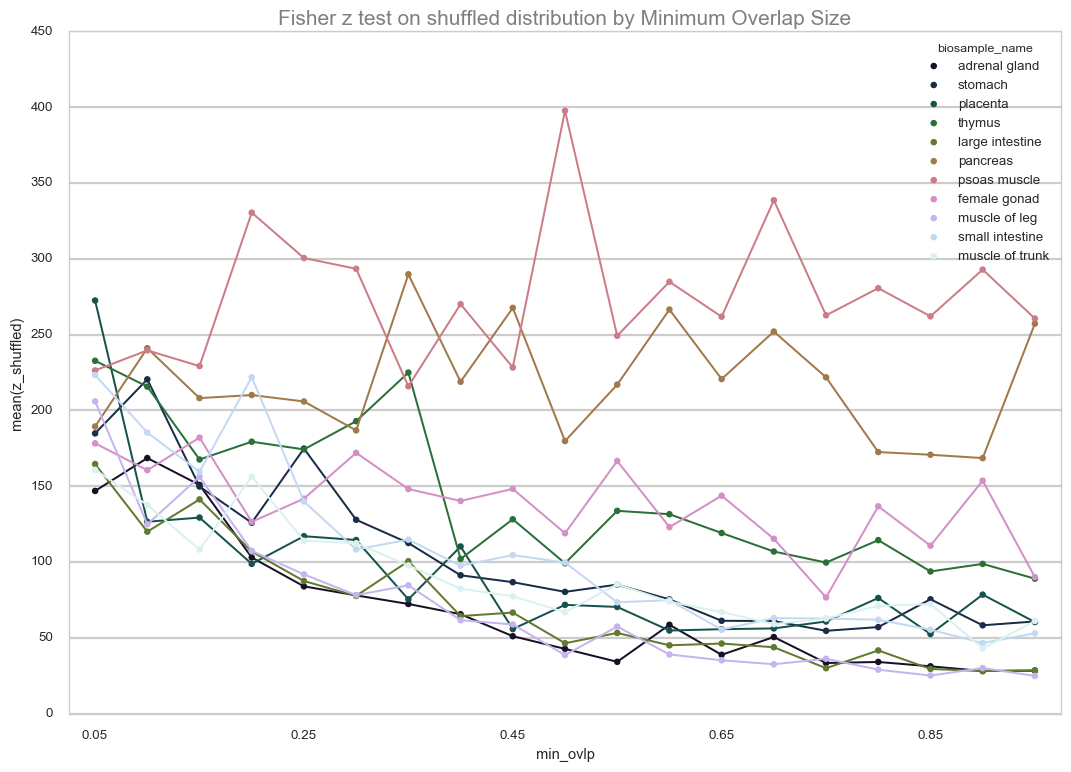

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="z_shuffled", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1, ci=None)
g.axes.set_title('Fisher z test on shuffled distribution by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

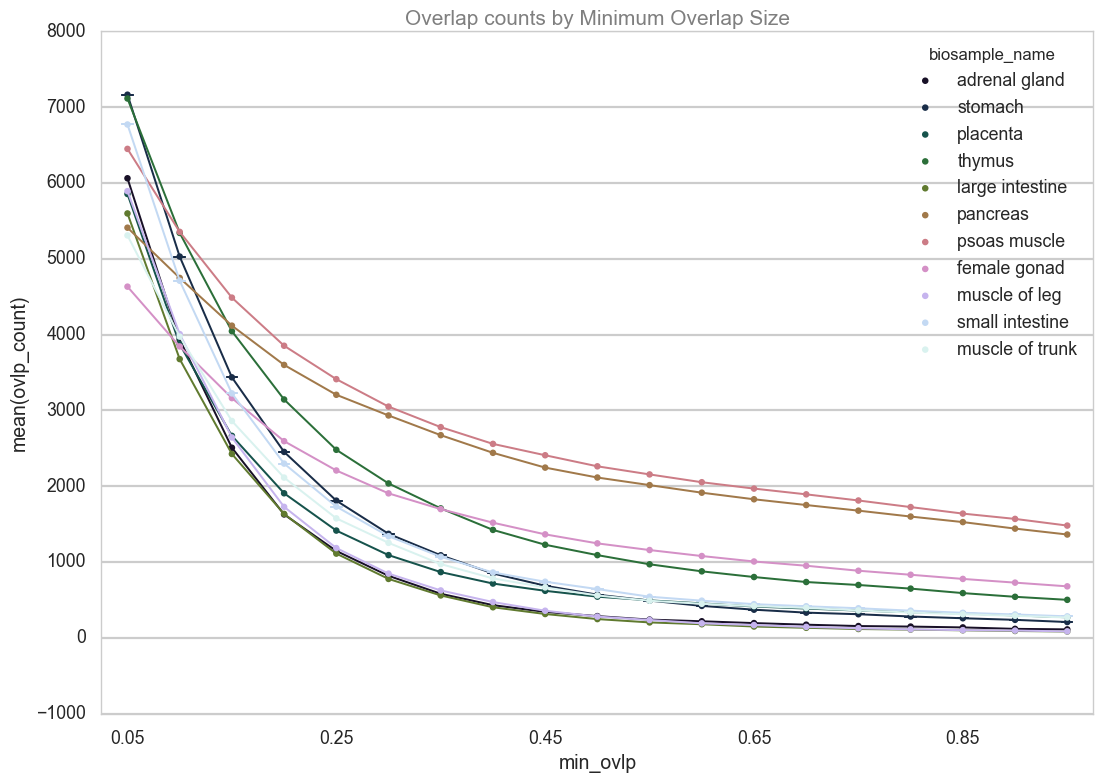

In [20]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="ovlp_count", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [21]:
reldist_df = pd.read_hdf('../storage/stats.hdf', 'encode_fantom_reldist')

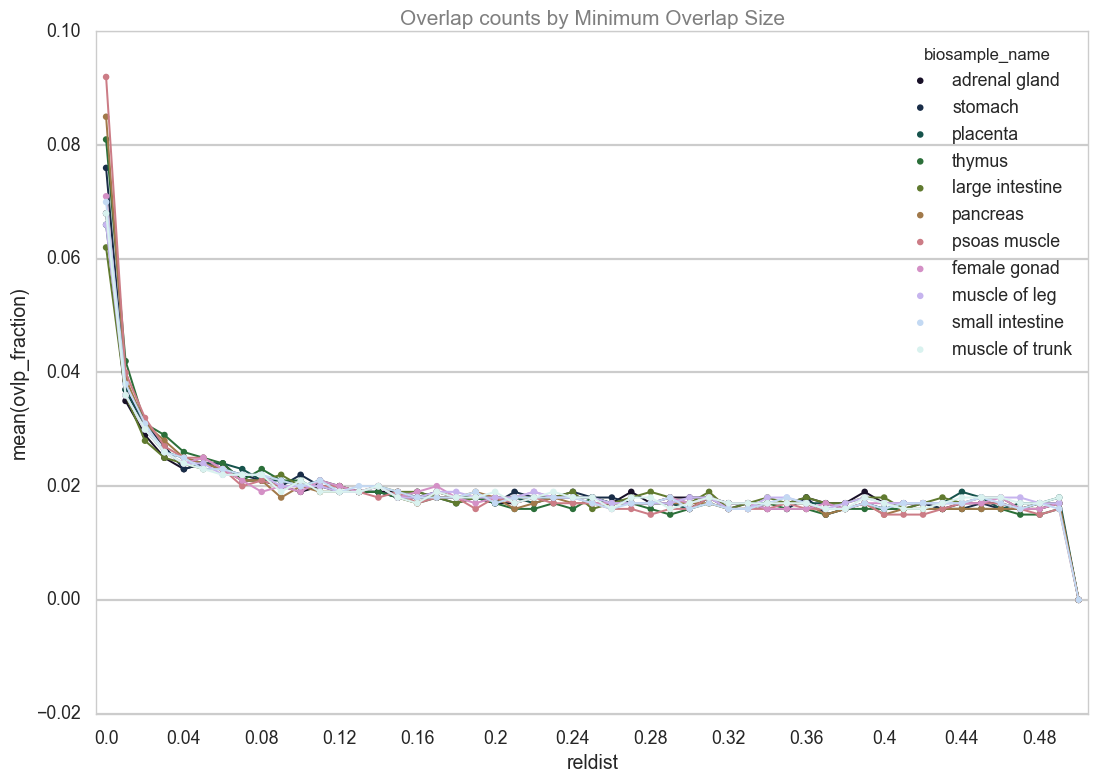

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="reldist", y="ovlp_fraction", hue="biosample_name", data=reldist_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

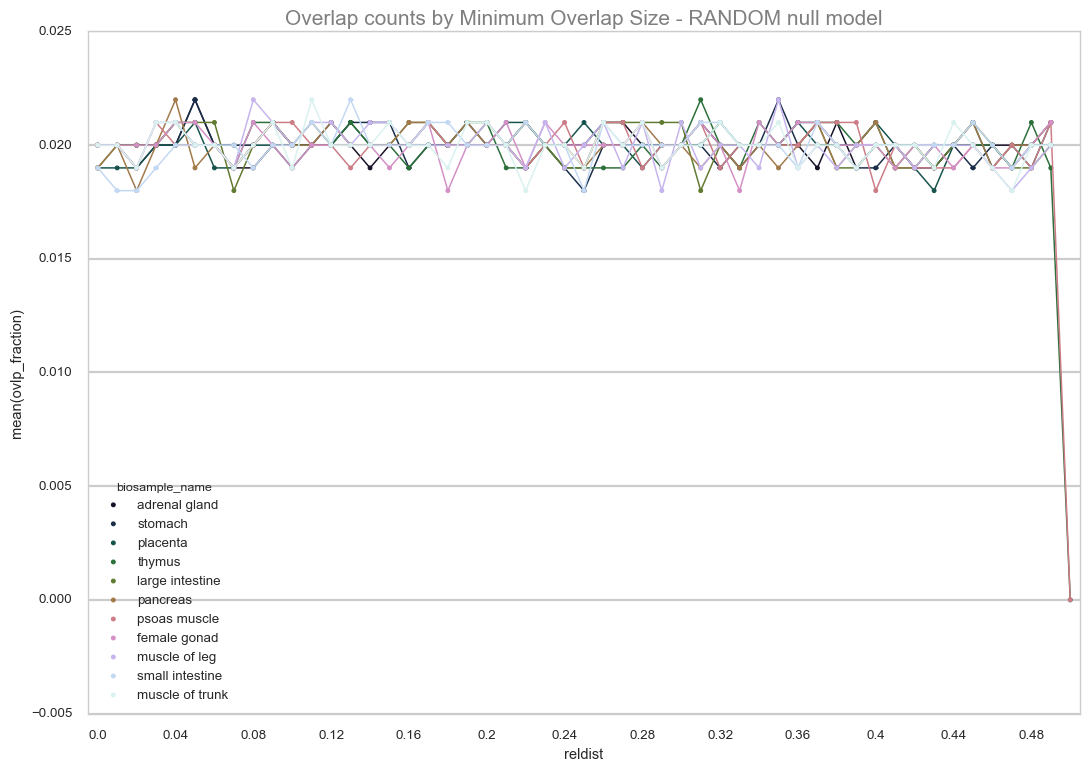

In [26]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.6})
g = sns.pointplot(x="reldist", y="ovlp_fraction", hue="biosample_name", data=reldist_df.query('ovlp_encyclopedia=="RANDOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size - RANDOM null model', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

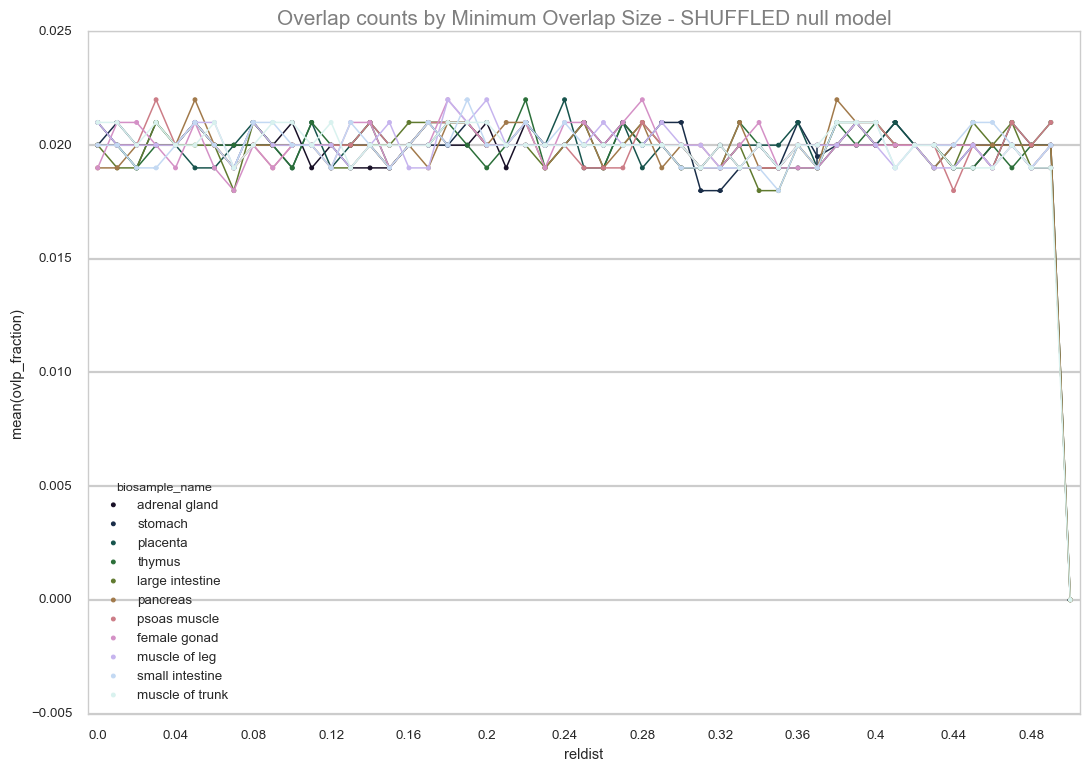

In [28]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.6})
g = sns.pointplot(x="reldist", y="ovlp_fraction", hue="biosample_name", data=reldist_df.query('ovlp_encyclopedia=="SHUFFLED"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size - SHUFFLED null model', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)